In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备T')

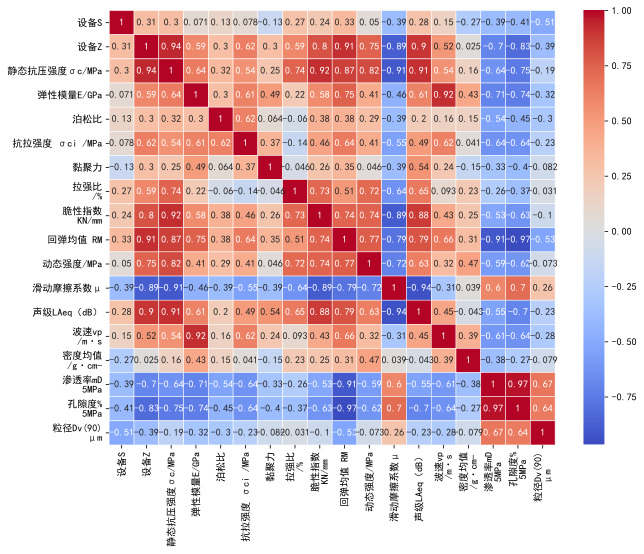

In [31]:
#相关性分析
#皮尔逊相关系数
#去除序号和岩性名称两列
rock_character = rock_character.drop(['序号', '岩性名称'], axis=1)
corr_matrix = rock_character.corr()
# 设置图像大小
plt.figure(figsize=(10, 8))
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

# 使用Seaborn绘制热力图
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={'size': 10})  # annot=True会显示数字在单元格内
plt.show()

In [10]:
device_wob.head()

,时间/s,材料2,材料4,材料5,材料7,材料8,材料10,材料11,材料13,材料55,材料21,材料22
0,1050.079,3.52979,3.86777,4.21938,3.59135,3.96912,3.85427,4.25898,3.40934,3.47527,3.47438,3.57316
1,1050.408,3.57550,4.15474,4.22286,4.16016,3.80430,4.22770,4.28917,3.36766,3.46216,3.71893,3.09925
2,1050.736,3.02758,3.97370,4.29815,4.43740,3.87965,4.39262,4.23249,3.51096,3.45398,3.36218,3.85679
3,1050.958,3.65089,3.84635,4.08101,3.26430,3.89811,3.92192,4.92878,3.39680,3.43509,3.52313,3.55268
4,1051.288,3.30212,4.09004,4.23566,4.10532,3.80647,3.42948,4.63190,3.38498,3.56799,3.67709,4.00877


In [11]:
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_wob.head(n=10)

,时间/s,材料2,材料4,材料5,材料7,材料8,材料10,材料11,材料13,材料55,材料21,材料22,time
0,1050.079,3.52979,3.86777,4.21938,3.59135,3.96912,3.85427,4.25898,3.40934,3.47527,3.47438,3.57316,1050
1,1050.408,3.57550,4.15474,4.22286,4.16016,3.80430,4.22770,4.28917,3.36766,3.46216,3.71893,3.09925,1050
2,1050.736,3.02758,3.97370,4.29815,4.43740,3.87965,4.39262,4.23249,3.51096,3.45398,3.36218,3.85679,1050
3,1050.958,3.65089,3.84635,4.08101,3.26430,3.89811,3.92192,4.92878,3.39680,3.43509,3.52313,3.55268,1050
4,1051.288,3.30212,4.09004,4.23566,4.10532,3.80647,3.42948,4.63190,3.38498,3.56799,3.67709,4.00877,1051
5,1051.618,3.63342,3.86366,4.12280,3.79748,3.89958,4.36011,4.16036,3.45208,3.43067,3.59268,3.70822,1051
6,1051.946,3.38165,4.00035,4.11504,5.01131,3.80127,3.81102,3.86702,3.41159,3.56794,3.61224,3.68734,1051
7,1052.274,3.46744,3.80704,4.29575,3.46250,3.94969,3.94280,4.66765,3.39412,3.48195,3.35209,3.62289,1052
8,1052.603,3.56689,4.13628,4.23032,4.31827,3.75266,4.34272,4.65798,3.32595,3.44208,3.71092,3.16558,1052
9,1052.932,3.00286,4.02726,4.31455,4.43977,3.81083,3.93152,4.45048,3.48155,3.44631,3.14058,4.00427,1052


In [23]:
#每秒的数据取平均值
device_wob_mean = device_wob.groupby('time').mean().reset_index()
del device_wob_mean['时间/s']
device_wob_mean

,time,材料2,材料4,材料5,材料7,材料8,材料10,材料11,材料13,材料55,材料21,材料22
0,1050,3.445940,3.960640,4.205350,3.863303,3.887795,4.099127,4.427355,3.421190,3.456625,3.519655,3.520470
1,1051,3.439063,3.984683,4.157833,4.304703,3.835773,3.866870,4.219760,3.416217,3.522200,3.627337,3.801443
2,1052,3.345730,3.990193,4.280207,4.073513,3.837727,4.072347,4.592037,3.400540,3.456780,3.401197,3.597580
3,1053,3.520893,3.999773,4.150440,3.757700,3.864993,3.866420,4.414723,3.346260,3.467797,3.494450,3.764983
4,1054,3.493350,3.950957,4.177577,4.331443,3.845993,4.021987,4.489197,3.388920,3.565577,3.454150,3.515560
...,...,...,...,...,...,...,...,...,...,...,...,...
418,1468,3.615830,3.795980,3.801885,4.045815,3.955995,3.250948,4.485185,3.516415,3.322255,3.437295,4.343552
419,1469,3.763063,3.923870,3.791680,3.748270,3.848367,3.223453,4.846117,3.562380,3.179560,3.470410,4.295503
420,1470,3.553097,3.789917,3.836610,4.108260,3.892907,3.319267,4.265227,3.533330,3.272707,3.374977,4.320263
421,1471,3.542663,3.799937,3.767320,3.699123,3.934620,3.166800,4.500073,3.562587,3.532447,3.558050,4.372880


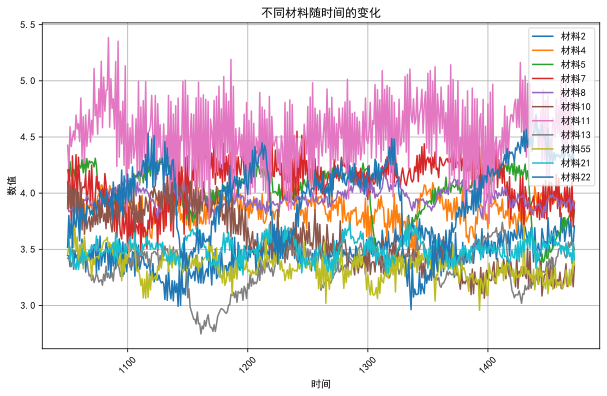

In [24]:
device_wob_mean = device_wob_mean.set_index('time')
# 绘制所有列（除了已经设置为索引的'time'列）
device_wob_mean.plot(figsize=(10, 6))  # figsize参数用于设置图表大小

plt.title('不同材料随时间的变化')  # 添加标题
plt.xlabel('时间')  # 添加X轴标签，
plt.ylabel('数值')  # 添加Y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.xticks(rotation=45)  # 旋转X轴的标签，以免重叠，根据需要调整
plt.show()

##### 计算每种材料的波动幅度
针对wob，可以看出不同材料的波动幅度差异较大、其中11、22波动较大
我们主要提取他的波动幅度，波动大小，数值大小

In [16]:
#每秒的数据取平均值
device_T_mean = device_T.groupby('time').mean().reset_index()
del device_T_mean['时间/s']
device_T_mean

,time,材料2,材料4,材料5,材料7,材料8,材料10,材料11,材料13,材料55,材料21,材料22
0,1050,10.688500,9.608750,16.656000,6.986750,13.645000,8.671250,14.922500,19.341000,5.454500,6.338250,22.440500
1,1051,9.269333,9.065000,17.168333,7.460333,13.490333,8.660667,14.729667,18.650333,5.512667,6.471000,23.235333
2,1052,10.291000,9.423667,16.966333,6.118667,13.126667,9.328333,14.429000,19.249667,5.347667,6.423667,20.679000
3,1053,9.795333,9.697667,16.947000,8.309333,13.255000,8.089000,14.284667,19.299000,5.685000,6.521667,24.160333
4,1054,10.090667,9.133333,16.496667,6.709667,13.162000,9.006667,14.458667,18.395000,5.740000,6.154667,21.994000
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1402,11.020667,9.193000,15.688000,9.144667,14.396333,7.018333,16.616000,18.947000,5.340667,5.476000,26.890667
353,1403,11.163000,8.995250,15.976750,9.568750,14.794750,7.966750,13.236000,18.850500,6.063500,6.000500,25.357000
354,1404,10.954000,9.522000,15.874333,9.547333,14.821667,7.589667,16.719667,19.288333,5.846333,5.655000,27.533667
355,1405,11.043333,9.265333,15.907667,8.251667,15.205000,7.676000,13.310667,18.599333,5.402000,5.646000,24.355333


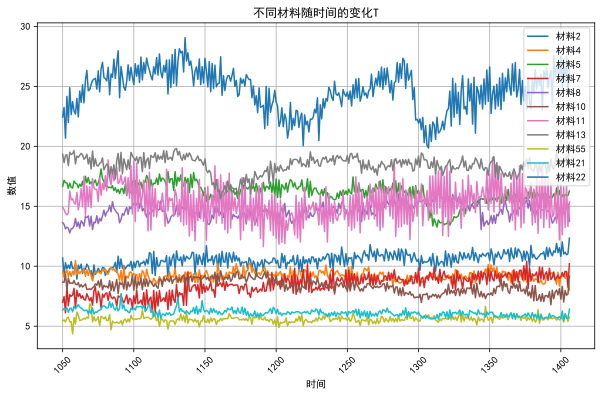

In [25]:
device_T_mean = device_T_mean.set_index('time')
# 绘制所有列（除了已经设置为索引的'time'列）
device_T_mean.plot(figsize=(10, 6))  # figsize参数用于设置图表大小

plt.title('不同材料随时间的变化T')  # 添加标题
plt.xlabel('时间')  
plt.ylabel('数值')  # 添加Y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.xticks(rotation=45)  # 旋转X轴的标签，以免重叠，根据需要调整
plt.show()

T：不同材料之间数值差异比较大，可以考虑均值、最大最小值 中位数等特征影响较大
材料22波动也较大

In [35]:
device_wob_mean.to_csv('device_wob_mean.csv',encoding='utf-8-sig')

In [36]:
device_T_mean.to_csv('device_T_mean.csv',encoding='utf-8-sig')